In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\ASHOK\Documents\Principle component analysis (PCA) dataset win.csv")
data.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Unnamed: 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [10]:
data.columns

Index(['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
       'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline', 'Customer_Segment',
       'Unnamed: 13'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Malic_Acid            178 non-null    float64
 1   Ash                   178 non-null    float64
 2   Ash_Alcanity          178 non-null    float64
 3   Magnesium             178 non-null    float64
 4   Total_Phenols         178 non-null    int64  
 5   Flavanoids            178 non-null    float64
 6   Nonflavanoid_Phenols  178 non-null    float64
 7   Proanthocyanins       178 non-null    float64
 8   Color_Intensity       178 non-null    float64
 9   Hue                   178 non-null    float64
 10  OD280                 178 non-null    float64
 11  Proline               178 non-null    float64
 12  Customer_Segment      178 non-null    int64  
 13  Unnamed: 13           178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [11]:
data['Unnamed: 13'].unique()

array([1, 2, 3], dtype=int64)

In [4]:
data.isnull().sum()

Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
Unnamed: 13             0
dtype: int64

In [30]:
print(data.isnull().values.any())

False


In [12]:
X = data
y = data['Unnamed: 13']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30)


In [36]:
X_train.shape, X_test.shape

((124, 14), (54, 14))

In [37]:
from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train = sm.fit_transform(X_train)
X_test = sm.transform(X_test)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

variance = pca.explained_variance_ratio_

In [40]:
variance

array([0.40148802, 0.18426134])

In [51]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [42]:
from sklearn.linear_model import LogisticRegression

classifier =  LogisticRegression()

classifier.fit(X_train,y_train)



LogisticRegression()

In [44]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  2,  0],
       [ 0, 18,  0],
       [ 0,  0, 24]], dtype=int64)

<AxesSubplot:>

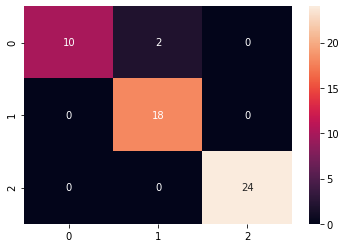

In [49]:
import seaborn as sns

sns.heatmap(cm, annot = True)

In [50]:
 accuracy_score(y_test, y_pred)

0.9629629629629629